In [48]:
from xml.etree import ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import csv

def generate_coordinates_dictionary(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    content_list = []
    for said_tag in root.findall('.//{http://www.tei-c.org/ns/1.0}said'):
        who_tag = said_tag.get('who')
        listener_tag = said_tag.get('toWhom')
        if who_tag is not None:
            content_list.append((who_tag,listener_tag))

    interactions={}
    for i in content_list:
        if i not in interactions:
            interactions[i] = 1
        else:
            interactions[i] +=1
    
        # Write interactions to a CSV file
    with open('interactions.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        
        # Write header
        csvwriter.writerow(['Character', 'Listener', 'Interaction Count'])
        
        # Write data rows
        for (who, listener), count in interactions.items():
            listener_str = listener if listener else "unknown"
            csvwriter.writerow([who, listener_str, count])

    print("CSV file 'interactions.csv' created.")

generate_coordinates_dictionary("C:/Users/crosi/Documents/GitHub/metascript/Dream_Story.xml")

CSV file 'interactions.csv' created.


In [4]:
from xml.etree import ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import csv

def generate_sinteractions(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    content_list = []
    scene = 0
    for div_tag in root.findall('.//{http://www.tei-c.org/ns/1.0}div'):
        if div_tag.get('type') == 'subdivision':
            scene +=1
            for said_tag in div_tag.findall('.//{http://www.tei-c.org/ns/1.0}said'):
                who_tag = said_tag.get('who')
                listener_tag = said_tag.get('toWhom')
                if who_tag is not None:
                    content_list.append((who_tag, listener_tag))

                interactions = {}
                for i in content_list:
                    if i not in interactions:
                        interactions[i] = 1
                    else:
                        interactions[i] += 1

                    # Write interactions to a CSV file
                with open('partial_interactions.csv', 'w', newline='') as csvfile:
                    csvwriter = csv.writer(csvfile)
                        
                        # Write header
                    csvwriter.writerow(['Scene','Character', 'Listener', 'Interaction Count'])
                       
                        # Write data rows
                    for (who, listener), count in interactions.items():
                        listener_str = listener if listener else "unknown"

                        csvwriter.writerow([f'scene_{scene}', who, listener_str, count])

                print("CSV file 'partial_interactions.csv' created.")

generate_sinteractions("C:/Users/crosi/Documents/GitHub/metascript/Dream_Story.xml")

CSV file 'partial_interactions.csv' created.
CSV file 'partial_interactions.csv' created.


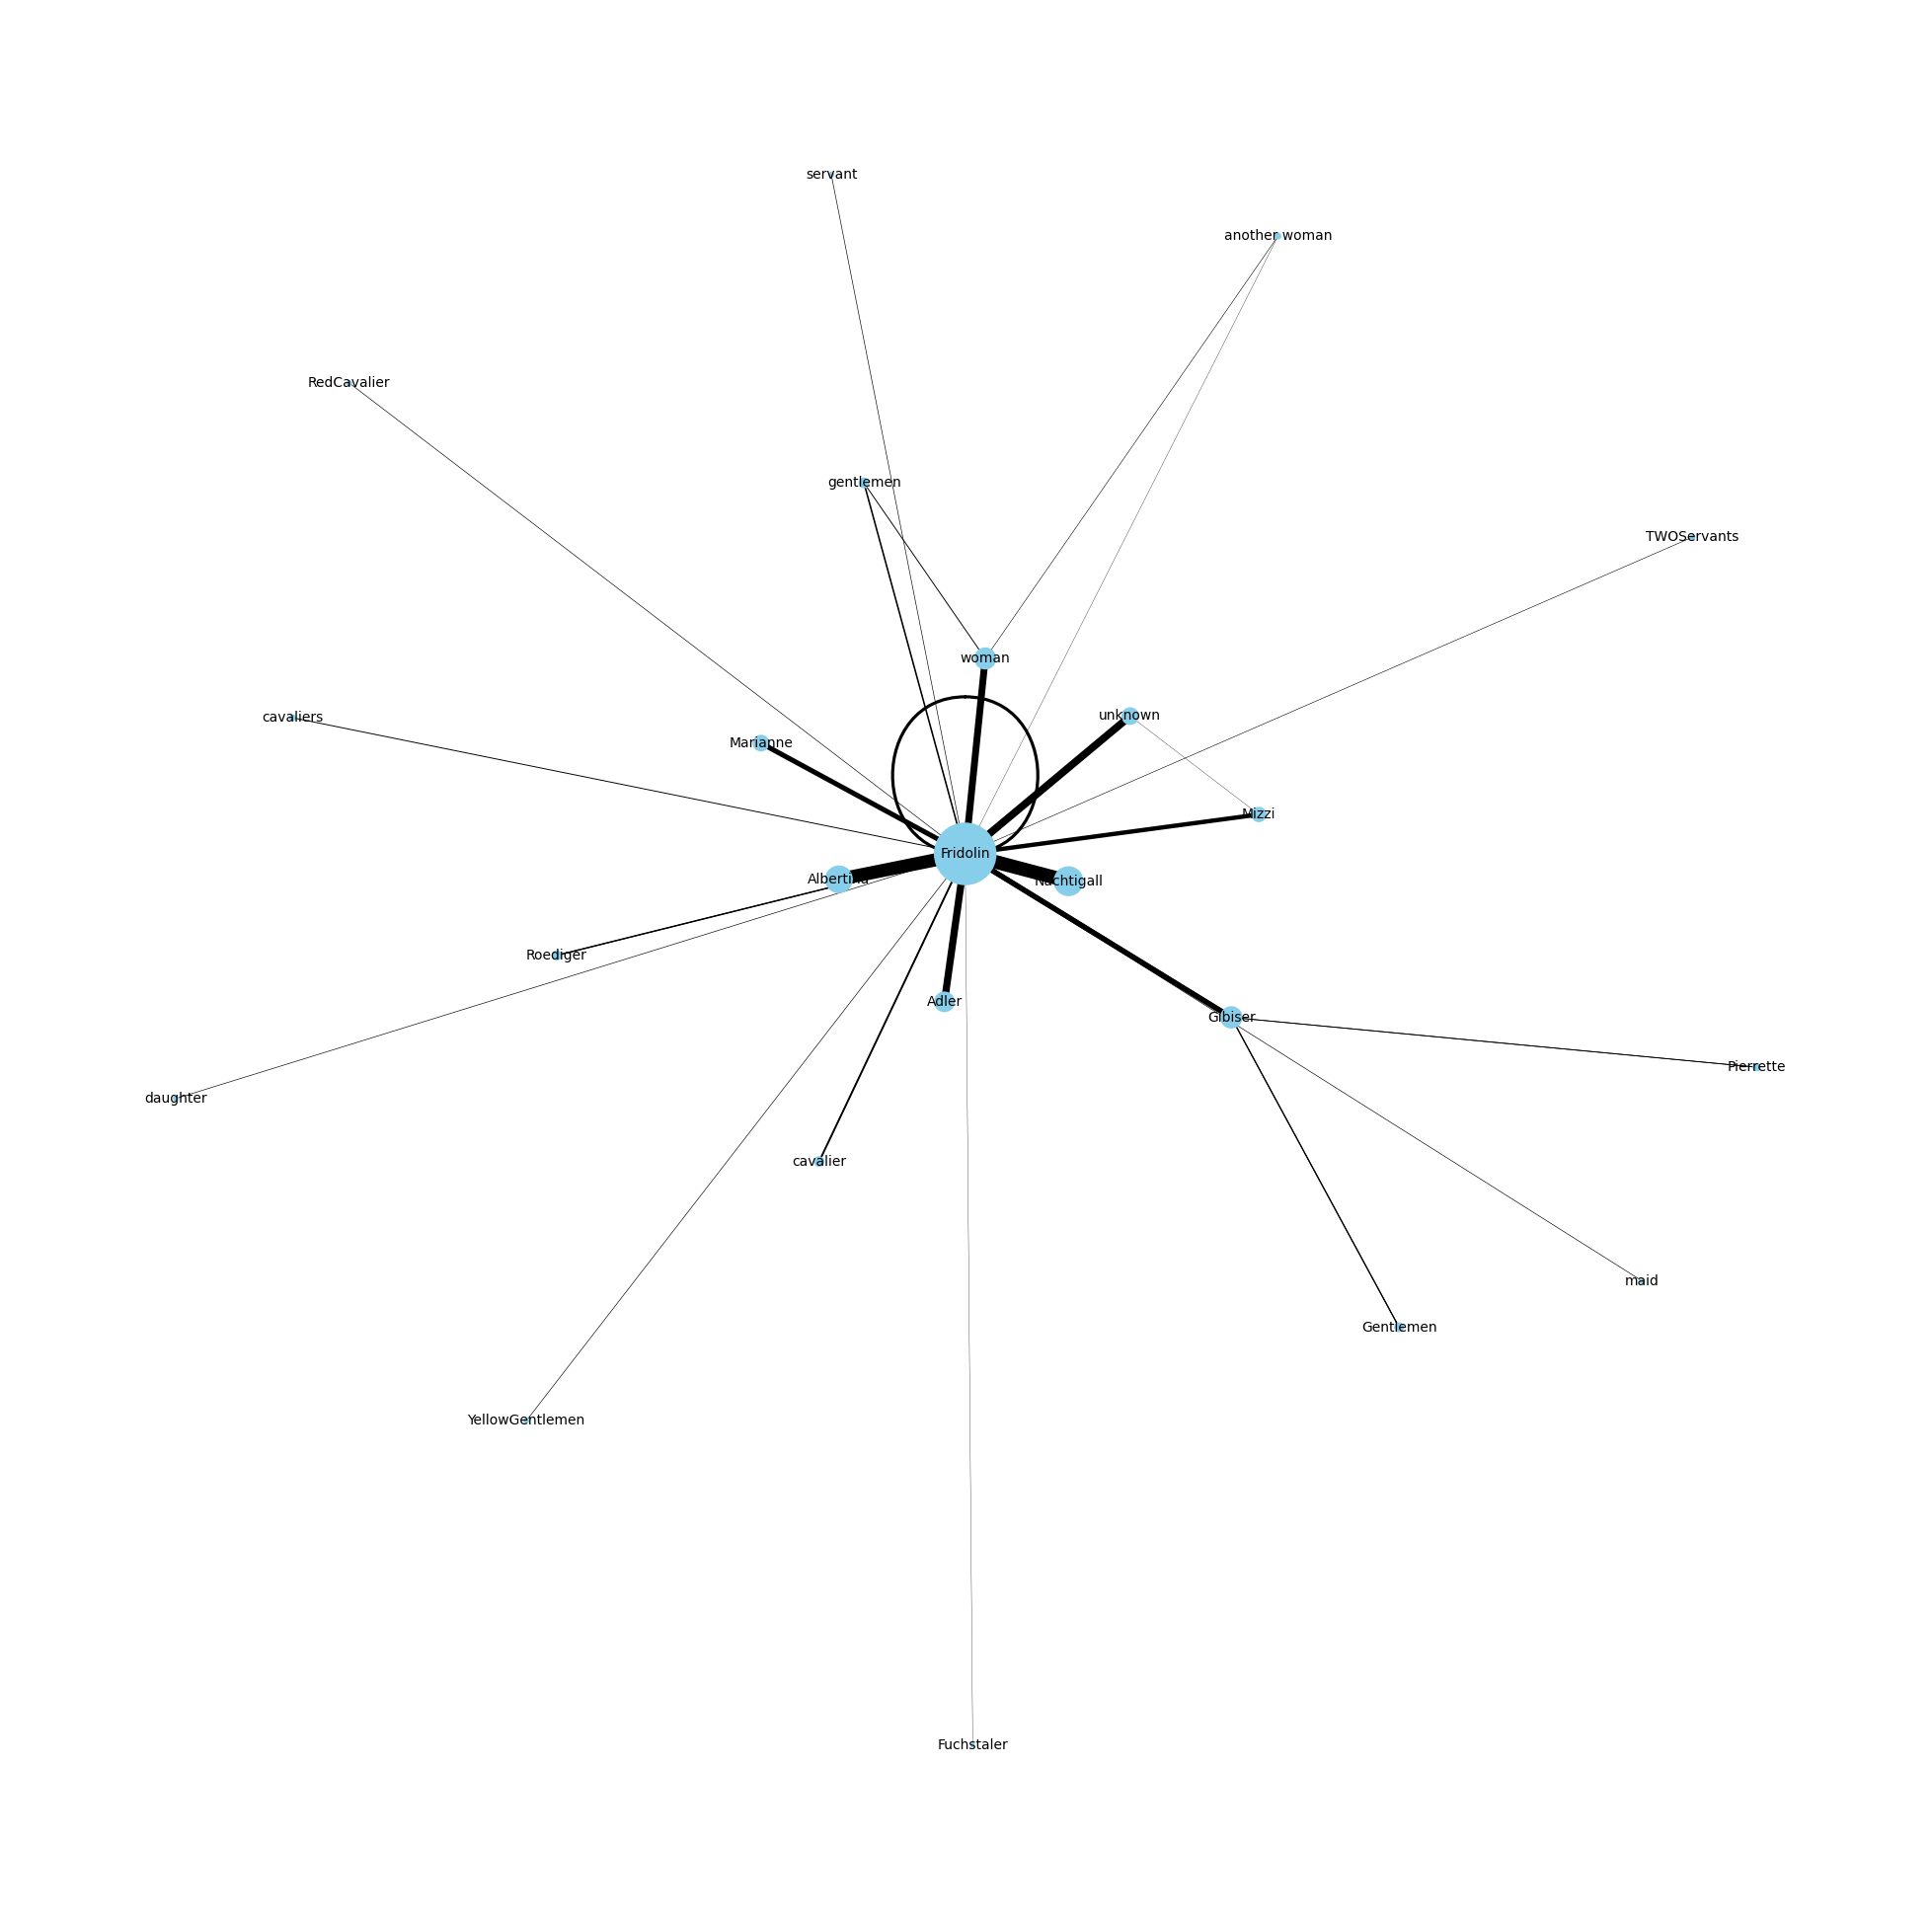

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

# Read CSV data
df = pd.read_csv('interactions.csv')

# Create a graph
G = nx.MultiGraph()

# Add nodes and edges
for index, row in df.iterrows():
    source = row['Character']
    target = row['Listener']
    interactions = row['Interaction Count']  # Assuming 'interactions' is the column with interaction counts
    G.add_edge(source, target, weight=interactions)

# Create a layout for our nodes
pos = nx.spring_layout(G)

# Get edge weights as a list
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Normalize edge weights for visualization thickness
edge_weights_normalized = [float(w) / max(edge_weights) * 10 for w in edge_weights]

# Calculate total interaction weight for each character
total_weights = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

# Determine the maximum total weight for scaling
max_total_weight = max(total_weights.values())

# Calculate node sizes based on total weights
node_sizes = [total_weights[node] / max_total_weight * 2000 for node in G.nodes()]

# Create a new figure and separate nodes and edges plots
plt.figure(figsize=(25, 25))

# Draw nodes with proportional sizes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, width=edge_weights_normalized)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10)

# Show the plot
plt.axis('off')
plt.show()




Codice per estrarre i personaggi dalla sceneggiatura e la frequenza delle volte in cui parlano

In [ ]:
import xml.etree.ElementTree as ET
import csv


def generate_interactions_dictionary(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    container_dict = {}
    scene_numbers = []  
    
    for div_tag in root.findall('.//{http://www.tei-c.org/ns/1.0}div'):
        type_tag = div_tag.get('type')
        number = div_tag.get('n')
        
        if type_tag == 'scene' and number is not None: 
            scene_numbers.append(number)  
    
    for scene_number in scene_numbers:
        interactions_dict = {}
        
        for div_tag in root.findall('.//{http://www.tei-c.org/ns/1.0}div'):
            type_tag = div_tag.get('type')
            number = div_tag.get('n')
            
            if type_tag == 'scene' and number == scene_number:
                speaker_element = div_tag.findall('.//{http://www.tei-c.org/ns/1.0}speaker')
                
                for i in speaker_element:
                    speaker_name = i.text
                    if speaker_name not in interactions_dict:
                        interactions_dict[speaker_name] = 1
                    else:
                        interactions_dict[speaker_name] += 1
                
        container_dict[f'scene_{scene_number}'] = interactions_dict
    print(container_dict)

    with open('interactions_screenplay.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
            
        csvwriter.writerow(['Scene', 'Name', 'Interactions'])
            
        for key,value in container_dict.items():
            for name, interaction in value.items():
                csvwriter.writerow([key,name,interaction])

    print("CSV file 'interactions_screenplay.csv' created.")


generate_interactions_dictionary("C:/Users/crosi/Documents/GitHub/metascript/screenplay_1996.xml")